In [4]:
# Load libraries
import pandas as pd
import numpy as np
from time import process_time
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import random
import math
from numpy.random import default_rng
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import itertools

# Synthetic Experiment: Angles of Linear System

In this experiment, we measure and compre the angles of each different linear system (Gaussian, Uniform, mixture, and correleated).

# Function for Computing $\sin^2\theta_{i_k}$

Using the $\cos^2\theta_{i_k}$ function, we wrote a function that computes $\sin^2\theta_{i_k}$

$$\cos^2\theta_{i_k} = \frac{\langle a_{i_k}, a_{i_{k-1}} \rangle^2}{||a_{i_k}||^2||a_{i_{k-1}}||^2}$$

$$\sin^2\theta_{i_k} = 1 - \cos^2\theta_{i_k}$$

In [5]:
def compute_sin2(A):
    m, n = A.shape
    # compute numerator
    inner_p = A@np.transpose(A)
    num = inner_p[np.triu_indices(m, k = 1)]
    # compute denominator
    inner_p_dig = np.diagonal(inner_p)
    inner_p_dig = np.reshape(inner_p_dig, (m, 1))
    prod = inner_p_dig @ np.transpose(inner_p_dig)
    denom = prod[np.triu_indices(m, k = 1)]
    # compute sin2
    cos2 = num**2 / denom
    sin2 = 1 - cos2
    
    return sin2

In [6]:
A = np.random.randn(5000,500)
inner_p = A@np.transpose(A)
inner_p_dig = np.diagonal(inner_p)

# Gaussian System

In [7]:
# Generate System
A = np.random.randn(5000,500)
x = np.ones(500)
y = A @ x
TOL = 10**-4

In [8]:
# Find the minimum singular value
U,S,V = np.linalg.svd(A)
S2_min = min(S**2)
# Find the max angle
angles_g = compute_sin2(A)
# Find the row norm
row_norm_g = np.sum(np.abs(A)**2,axis=-1)

(array([2.0000000e+00, 2.0000000e+01, 7.7000000e+01, 3.6000000e+02,
        1.6460000e+03, 7.9350000e+03, 3.6367000e+04, 1.7788400e+05,
        9.5993400e+05, 1.1313275e+07]),
 array([0.94412721, 0.94971449, 0.95530177, 0.96088905, 0.96647632,
        0.9720636 , 0.97765088, 0.98323816, 0.98882544, 0.99441272,
        1.        ]),
 <BarContainer object of 10 artists>)

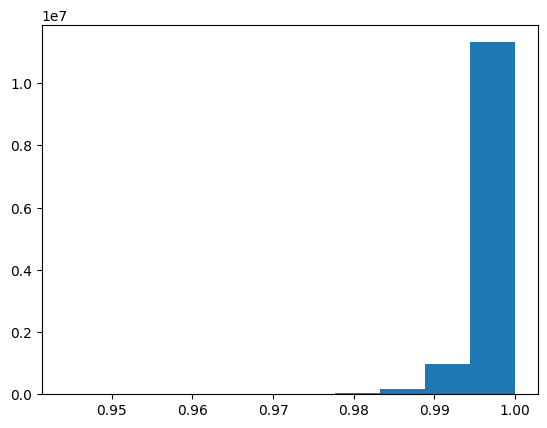

In [9]:
plt.hist(angles_g)

(array([   9.,  115.,  459., 1137., 1498., 1099.,  510.,  140.,   27.,
           6.]),
 array([390.34339139, 414.42532768, 438.50726397, 462.58920026,
        486.67113654, 510.75307283, 534.83500912, 558.91694541,
        582.9988817 , 607.08081799, 631.16275428]),
 <BarContainer object of 10 artists>)

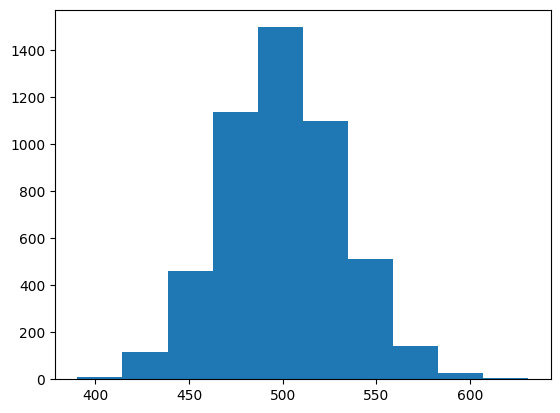

In [10]:
plt.hist(row_norm_g)

# Uniform System

In [11]:
# Generate System
A = np.random.uniform(low = 0, high = 1, size  = (5000,500))
x = np.ones(500)
y = A @ x

In [12]:
# Find the minimum singular value
U,S,V = np.linalg.svd(A)
S2_min = min(S**2)
# Find the max angle
angles_u = compute_sin2(A)
# Find the row norm
row_norm_u = np.sum(np.abs(A)**2,axis=-1)

(array([3.430000e+02, 2.049400e+04, 3.736420e+05, 2.263608e+06,
        4.816020e+06, 3.769299e+06, 1.120842e+06, 1.276000e+05,
        5.553000e+03, 9.900000e+01]),
 array([0.33162086, 0.35365397, 0.37568708, 0.39772019, 0.41975329,
        0.4417864 , 0.46381951, 0.48585262, 0.50788573, 0.52991884,
        0.55195194]),
 <BarContainer object of 10 artists>)

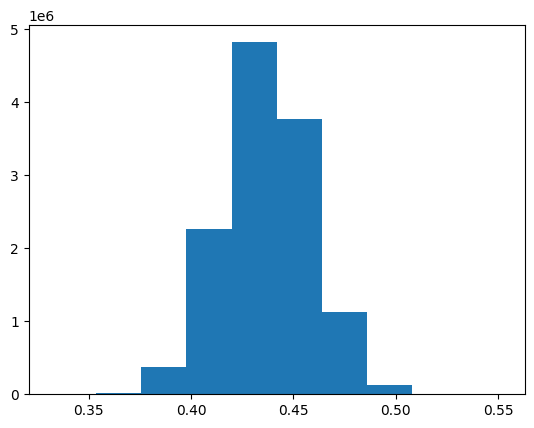

In [13]:
plt.hist(angles_u)

(array([  17.,   78.,  363.,  828., 1249., 1217.,  783.,  346.,   95.,
          24.]),
 array([144.66391498, 149.07107615, 153.47823732, 157.88539848,
        162.29255965, 166.69972082, 171.10688199, 175.51404315,
        179.92120432, 184.32836549, 188.73552666]),
 <BarContainer object of 10 artists>)

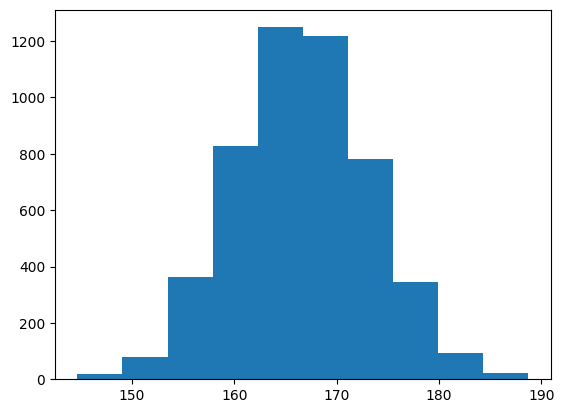

In [14]:
plt.hist(row_norm_u)

# Mixture Systems

## 50/50

In [15]:
# generate system
A1 = np.random.rand(2500,500)
A2 = np.random.uniform(low = 0, high = 1, size  = (2500,500))
A = np.concatenate((A1, A2))
x = np.ones(500)
y = A @ x

In [16]:
# Find the minimum singular value
U,S,V = np.linalg.svd(A)
S2_min = min(S**2)
# Find the max angle
angles_gu1 = compute_sin2(A)
# Find the row norm
row_norm_gu1 = np.sum(np.abs(A)**2,axis=-1)

(array([1.110000e+02, 1.002900e+04, 2.396270e+05, 1.795634e+06,
        4.593284e+06, 4.228116e+06, 1.438774e+06, 1.831840e+05,
        8.590000e+03, 1.510000e+02]),
 array([0.32650533, 0.34898908, 0.37147284, 0.3939566 , 0.41644035,
        0.43892411, 0.46140787, 0.48389162, 0.50637538, 0.52885914,
        0.55134289]),
 <BarContainer object of 10 artists>)

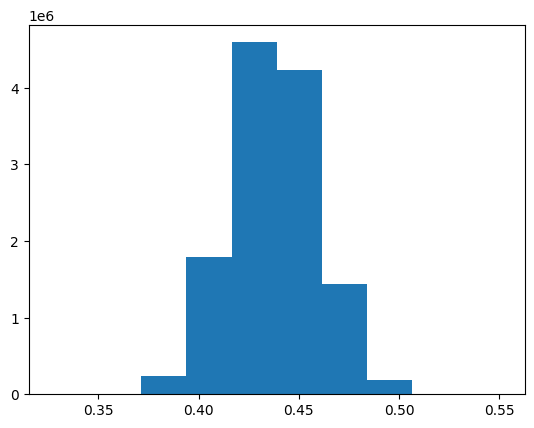

In [17]:
plt.hist(angles_gu1)

(array([  14.,   99.,  410.,  975., 1372., 1231.,  639.,  206.,   47.,
           7.]),
 array([143.48041322, 148.35753921, 153.23466521, 158.11179121,
        162.9889172 , 167.8660432 , 172.74316919, 177.62029519,
        182.49742118, 187.37454718, 192.25167317]),
 <BarContainer object of 10 artists>)

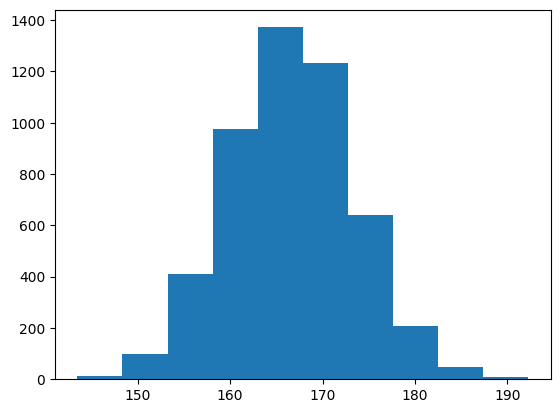

In [18]:
plt.hist(row_norm_gu1)

## 25/75

In [19]:
# generate system
A1 = np.random.rand(1250,500)
A2 = np.random.uniform(low = 0, high = 1, size  = (3750,500))
A = np.concatenate((A1, A2))
x = np.ones(500)
y = A @ x

In [20]:
# Find the minimum singular value
U,S,V = np.linalg.svd(A)
S2_min = min(S**2)
# Find the max angle
angles_gu2 = compute_sin2(A)
# Find the row norm
row_norm_gu2 = np.sum(np.abs(A)**2,axis=-1)

(array([1.610000e+02, 1.418500e+04, 3.323150e+05, 2.311600e+06,
        5.102447e+06, 3.725695e+06, 9.276650e+05, 8.063300e+04,
        2.743000e+03, 5.600000e+01]),
 array([0.32650518, 0.34983692, 0.37316865, 0.39650039, 0.41983212,
        0.44316386, 0.46649559, 0.48982733, 0.51315906, 0.5364908 ,
        0.55982253]),
 <BarContainer object of 10 artists>)

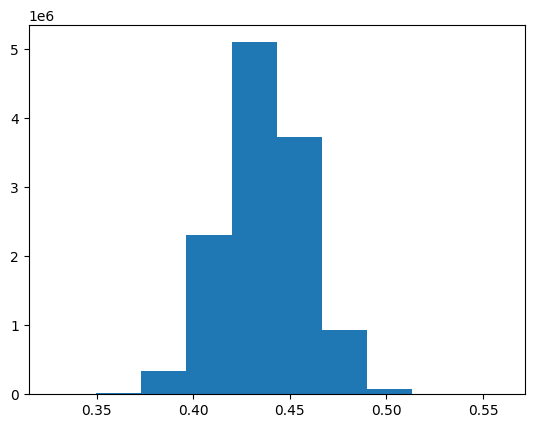

In [21]:
plt.hist(angles_gu2)

(array([  24.,  114.,  421.,  986., 1332., 1147.,  694.,  214.,   57.,
          11.]),
 array([144.81609227, 149.43649921, 154.05690614, 158.67731308,
        163.29772001, 167.91812694, 172.53853388, 177.15894081,
        181.77934775, 186.39975468, 191.02016161]),
 <BarContainer object of 10 artists>)

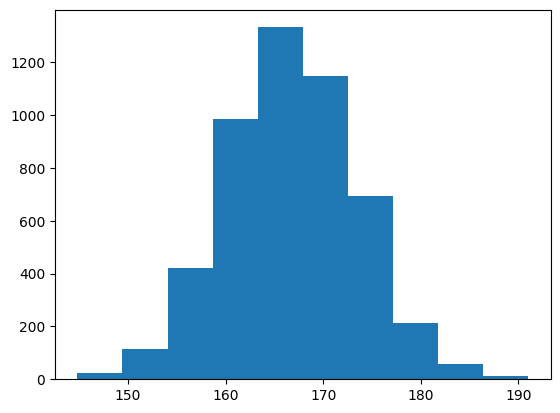

In [22]:
plt.hist(row_norm_gu2)

## 75/25

In [23]:
# generate system
A1 = np.random.rand(3750,500)
A2 = np.random.uniform(low = 0, high = 1, size  = (1250,500))
A = np.concatenate((A1, A2))
x = np.ones(500)
y = A @ x

In [24]:
# Find the minimum singular value
U,S,V = np.linalg.svd(A)
S2_min = min(S**2)
# Find the max angle
angles_gu3 = compute_sin2(A)
# Find the row norm
row_norm_gu3 = np.sum(np.abs(A)**2,axis=-1)

(array([4.000000e+02, 2.117600e+04, 3.753980e+05, 2.247766e+06,
        4.789316e+06, 3.783542e+06, 1.139940e+06, 1.336780e+05,
        6.164000e+03, 1.200000e+02]),
 array([0.33175347, 0.35378284, 0.37581222, 0.3978416 , 0.41987098,
        0.44190036, 0.46392974, 0.48595912, 0.5079885 , 0.53001787,
        0.55204725]),
 <BarContainer object of 10 artists>)

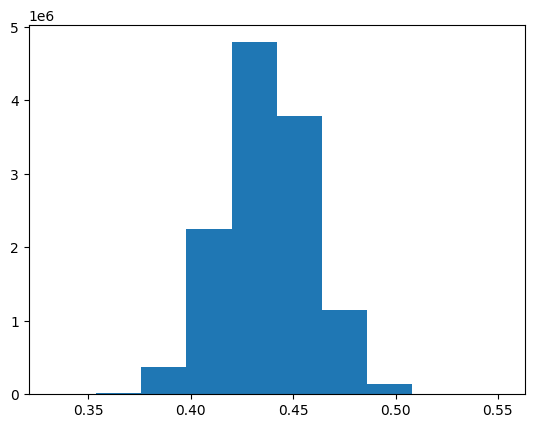

In [25]:
plt.hist(angles_gu3)

(array([  11.,   72.,  261.,  777., 1257., 1282.,  894.,  323.,   98.,
          25.]),
 array([142.91625816, 147.56352969, 152.21080122, 156.85807274,
        161.50534427, 166.1526158 , 170.79988732, 175.44715885,
        180.09443038, 184.74170191, 189.38897343]),
 <BarContainer object of 10 artists>)

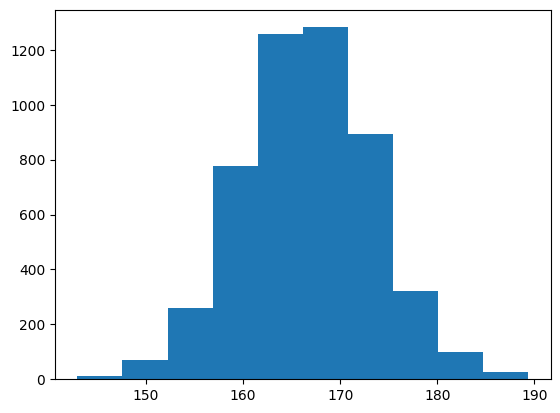

In [26]:
plt.hist(row_norm_gu3)

# 2 Highly Correlated Systems

In [27]:
# generate system
# Step 1: generate two gaussian linear system
A = np.random.randn(2,500)
A1 = np.reshape(A[0,:], (1, 500))
A2 = np.reshape(A[1,:], (1, 500))
# Step 2: generate correalted systems
U = np.random.uniform(low = 0, high = 1, size  = (2500,500))
A1 =  np.tile(A1, (2500, 1)) +  U
A2 =  np.tile(A2, (2500, 1)) +  U
# Step 3: Combine two correlated systems
A = np.concatenate((A1, A2))
x = np.ones(500)
y = A @ x

In [28]:
# Find the minimum singular value
U,S,V = np.linalg.svd(A)
S2_min = min(S**2)
# Find the max angle
angles_corr = compute_sin2(A)
# Find the row norm
row_norm_corr = np.sum(np.abs(A)**2,axis=-1)

(array([6.247451e+06, 4.900000e+01, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.000000e+00, 6.249999e+06]),
 array([0.0867368 , 0.17593319, 0.26512959, 0.35432598, 0.44352237,
        0.53271876, 0.62191515, 0.71111154, 0.80030793, 0.88950432,
        0.97870071]),
 <BarContainer object of 10 artists>)

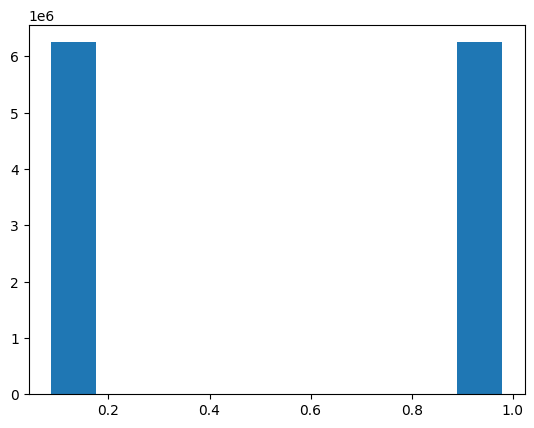

In [29]:
plt.hist(angles_corr)

(array([ 212., 1584.,  689.,   15.,    0.,   31.,  766., 1396.,  302.,
           5.]),
 array([515.98681769, 541.29867149, 566.61052529, 591.92237909,
        617.2342329 , 642.5460867 , 667.8579405 , 693.1697943 ,
        718.48164811, 743.79350191, 769.10535571]),
 <BarContainer object of 10 artists>)

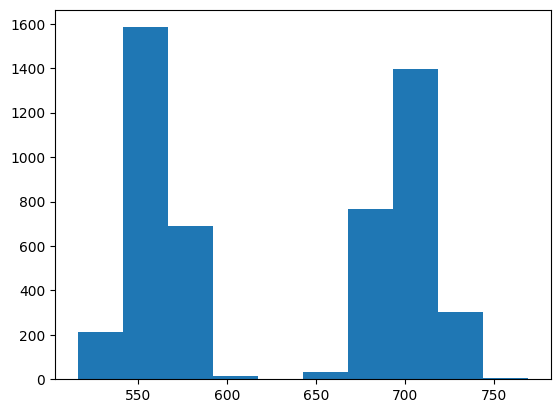

In [30]:
plt.hist(row_norm_corr)

# Results

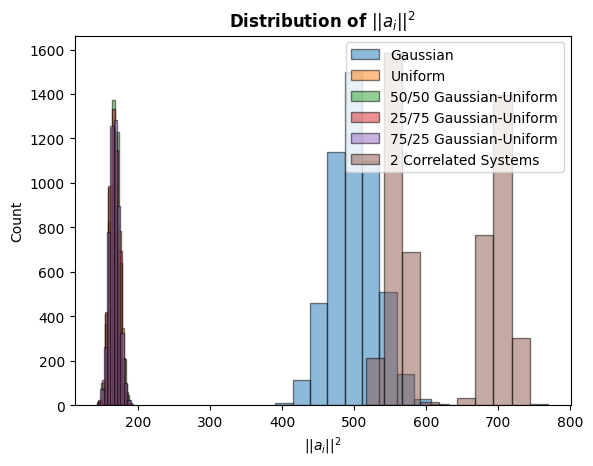

In [31]:
plt.hist(row_norm_g, label = "Gaussian",  alpha = 0.5, edgecolor = "black")
plt.hist(row_norm_u, label = "Uniform", alpha = 0.5, edgecolor = "black")
plt.hist(row_norm_gu1, label = "50/50 Gaussian-Uniform", alpha = 0.5, edgecolor = "black")
plt.hist(row_norm_gu2, label = "25/75 Gaussian-Uniform", alpha = 0.5, edgecolor = "black")
plt.hist(row_norm_gu3, label = "75/25 Gaussian-Uniform", alpha = 0.5, edgecolor = "black")
plt.hist(row_norm_corr, label = "2 Correlated Systems", alpha = 0.5, edgecolor = "black")
plt.ylabel('Count', fontsize = 10)
plt.xlabel('$||a_i||^2$', fontsize = 10)
plt.title('Distribution of $||a_i||^2$', fontweight="bold")
plt.legend()

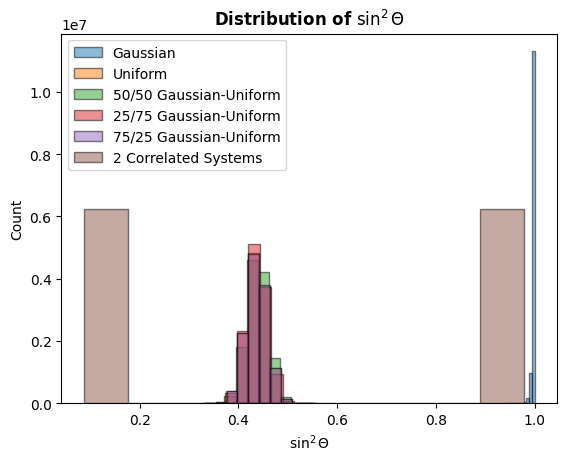

In [32]:
plt.hist(angles_g, label = "Gaussian",  alpha = 0.5, edgecolor = "black")
plt.hist(angles_u, label = "Uniform", alpha = 0.5, edgecolor = "black")
plt.hist(angles_gu1, label = "50/50 Gaussian-Uniform", alpha = 0.5, edgecolor = "black")
plt.hist(angles_gu2, label = "25/75 Gaussian-Uniform", alpha = 0.5, edgecolor = "black")
plt.hist(angles_gu3, label = "75/25 Gaussian-Uniform", alpha = 0.5, edgecolor = "black")
plt.hist(angles_corr, label = "2 Correlated Systems", alpha = 0.5, edgecolor = "black")
plt.ylabel('Count', fontsize = 10)
plt.xlabel('$\sin^2\Theta$', fontsize = 10)
plt.title('Distribution of $\sin^2\Theta$', fontweight="bold")
plt.legend()